In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 12) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline

In [2]:
# rects008 = rects.loc[rects['wire_dia (mm)'] == 0.08]
# rects008.to_excel('rects008.xlsx')

In [3]:
# rects01 = rects.loc[rects['wire_dia (mm)'] == 0.1]
# rects01.to_excel('rects01.xlsx')

In [4]:
# rects_teeth = df.loc[df['file'].str.match('VEXPN2')]
# rects_teeth.to_excel('vexpn2xx.xlsx')

In [5]:
coil_freq = df.loc[df['freq'].notnull() & df['L, uH'].notnull()]
coil_freq['Lsqrt'] = coil_freq['L, uH'].apply(lambda x: 1/math.sqrt(x))
coil_freq

<ipython-input-5-0c67fac3423d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coil_freq['Lsqrt'] = coil_freq['L, uH'].apply(lambda x: 1/math.sqrt(x))


,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done,Lsqrt
38,V123NEW,148.288,0.08,0.2,5.0,44.3,63.2,4.636,17620.0,36.0,rect-inner-rect-5-0-5,+,0.464439
40,V123NEW1,119.562,0.08,0.2,4.0,44.3,63.2,3.253,21370.0,40.0,"rect-inner-rect-4-0-4-(3,227)",+,0.554444
64,V202,76.766,0.08,0.2,3.0,45.0,79.0,2.656,24000.0,22.0,rect-v,NaN,0.613601
65,V202,76.766,0.10,0.2,3.0,45.0,79.0,2.601,24000.0,22.0,rect-v,NaN,0.620054
66,V203,76.546,0.08,0.3,3.0,45.0,79.0,2.561,24000.0,22.0,rect-v,NaN,0.624878
...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,VID1FS25,138.427,0.08,0.3,6.0,44.7,78.5,5.728,14390.0,65.0,t,NaN,0.417829
327,VID1FS26,146.967,0.08,0.3,6.0,44.7,78.5,6.084,13900.0,63.0,t,NaN,0.405420
349,VMEDVED,93.797,0.08,0.3,3.0,49.7,78.2,2.777,24000.0,22.0,medved,NaN,0.600084
354,VMO1,111.706,0.10,0.3,4.0,45.0,79.0,4.211,18470.0,59.0,text-MO,+,0.487312


In [6]:
coil_freq['Lcalc'] = coil_freq['freq'].apply(lambda f: (0.863) / pow(f / 1000, 2))
coil_freq['Lcalc_sqrt'] = coil_freq['Lcalc'].apply(lambda l: 1 / math.sqrt(l))
coil_freq

<ipython-input-6-332a95677bb5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coil_freq['Lcalc'] = coil_freq['freq'].apply(lambda f: (0.863) / pow(f / 1000, 2))
<ipython-input-6-332a95677bb5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coil_freq['Lcalc_sqrt'] = coil_freq['Lcalc'].apply(lambda l: 1 / math.sqrt(l))


,file,wire_len (cm),wire_dia (mm),step (mm),coil_n,width (mm),height (mm),"L, uH",freq,q,mod,done,Lsqrt,Lcalc,Lcalc_sqrt
38,V123NEW,148.288,0.08,0.2,5.0,44.3,63.2,4.636,17620.0,36.0,rect-inner-rect-5-0-5,+,0.464439,0.002780,18.967081
40,V123NEW1,119.562,0.08,0.2,4.0,44.3,63.2,3.253,21370.0,40.0,"rect-inner-rect-4-0-4-(3,227)",+,0.554444,0.001890,23.003776
64,V202,76.766,0.08,0.2,3.0,45.0,79.0,2.656,24000.0,22.0,rect-v,NaN,0.613601,0.001498,25.834844
65,V202,76.766,0.10,0.2,3.0,45.0,79.0,2.601,24000.0,22.0,rect-v,NaN,0.620054,0.001498,25.834844
66,V203,76.546,0.08,0.3,3.0,45.0,79.0,2.561,24000.0,22.0,rect-v,NaN,0.624878,0.001498,25.834844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,VID1FS25,138.427,0.08,0.3,6.0,44.7,78.5,5.728,14390.0,65.0,t,NaN,0.417829,0.004168,15.490142
327,VID1FS26,146.967,0.08,0.3,6.0,44.7,78.5,6.084,13900.0,63.0,t,NaN,0.405420,0.004467,14.962680
349,VMEDVED,93.797,0.08,0.3,3.0,49.7,78.2,2.777,24000.0,22.0,medved,NaN,0.600084,0.001498,25.834844
354,VMO1,111.706,0.10,0.3,4.0,45.0,79.0,4.211,18470.0,59.0,text-MO,+,0.487312,0.002530,19.882065


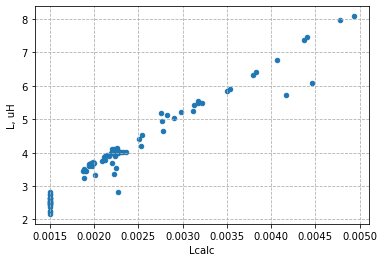

In [7]:
ax_l = coil_freq.plot.scatter(x='Lcalc', y='L, uH')
ax_l.grid(linestyle='--')

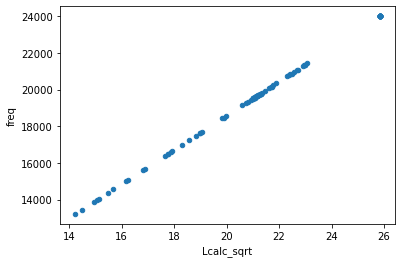

In [8]:
ax_sqrt = coil_freq.plot.scatter(x='Lcalc_sqrt', y='freq')

In [10]:
coil_freq['Lcalc_adjust'] = coil_freq['Lcalc'].apply(lambda l: l * 4 * pow(math.pi, 2))
coil_freq['coeff'] = coil_freq['L, uH'].apply(lambda l: l / coil_freq['Lcalc'])
coil_freq

<ipython-input-10-c211a8b5b0dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coil_freq['Lcalc_adjust'] = coil_freq['Lcalc'].apply(lambda l: l * 4 * pow(math.pi, 2))


ValueError: Wrong number of items passed 92, placement implies 1

In [ ]:
ax = coil_freq.plot.scatter(x='Lsqrt', y='freq')
ax.set_xlim(0, 1)
ax.set_ylim(0, 25000)

In [ ]:
coil_working = coil_freq.loc[coil_freq['freq'] < 23500]
coil_working

In [ ]:
ax2 = coil_working.plot.scatter(x='Lsqrt', y='freq')
# ax2.set_xlim(0.3, 0.65)
# ax2.set_ylim(10000, 24000)

In [ ]:
rects

In [ ]:
rects_freq = rects.loc[rects['freq'].notnull() & rects['L, uH'].notnull()]
rects_freq = rects_freq.loc[rects_freq['freq'] < 23500]
rects_freq

In [ ]:
rects_freq['Lsqrt'] = rects_freq['L, uH'].apply(lambda x: 1/math.sqrt(x))
rects_freq

In [ ]:
ax3 = rects_freq.plot.scatter(x='Lsqrt', y='freq')
ax3.set_xlim(0, 1)
ax3.set_ylim(0, 25000)